Import modules and libraries

In [8]:
import sys
sys.path.append("..")

from data import generate_synthetic, visualise
from src import linear_regression


We start by generating some relatively linear data

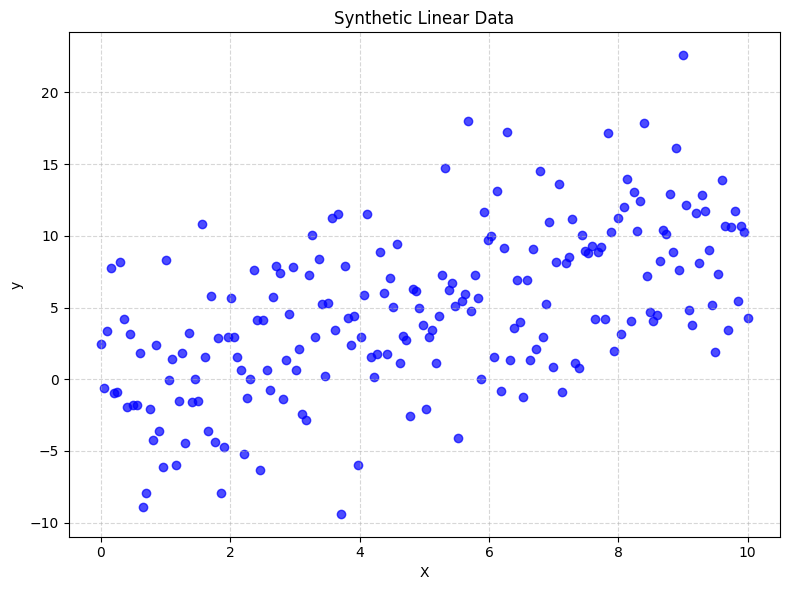

In [9]:
X, y = generate_synthetic.generate_linear_data(n_samples=200, noise=5)
visualise.plot_data(X, y)

Then we derive the parameter value Theta

In [10]:
theta = linear_regression.find_parameters(X, y)
theta

debug


6671.478219842678